In [1]:
%matplotlib inline

import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

engine = sa.create_engine('postgresql://postgres@/glottolog3.0')

df = pd.read_sql_query('''SELECT id, latitude, longitude
FROM language JOIN languoid USING (pk)
WHERE level = 'language'
ORDER BY id''', engine, index_col='id')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8444 entries, aari1239 to zyph1238
Data columns (total 2 columns):
latitude     7680 non-null float64
longitude    7680 non-null float64
dtypes: float64(2)
memory usage: 197.9+ KB


### Equidistant cylindrical projection (equirectangular)

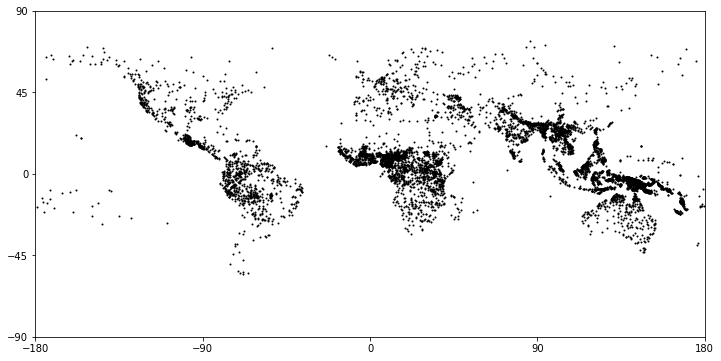

In [2]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis([-180, 180, -90, 90])
ax.set_xticks(range(-180, 181, 90))
ax.set_yticks(range(-90, 91, 45))
ax.scatter('longitude', 'latitude', 1, color='k', data=df);

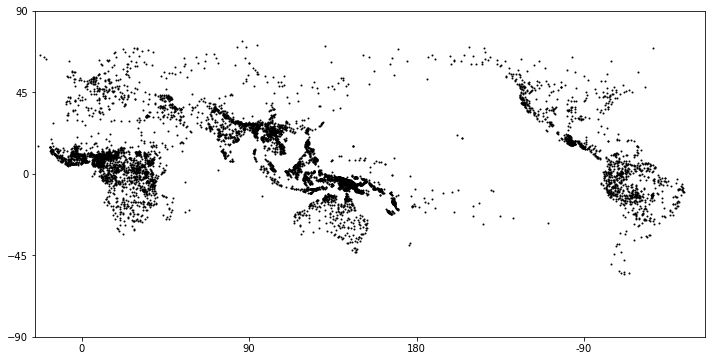

In [3]:
def shifted(degrees=180):
    """Return a function shifting longitudes westward by given degrees."""
    degrees %= 360
    cutoff = degrees - 180
    def shift(x):
        return x - degrees if x > cutoff else 360 + x - degrees
    return shift

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis([-180, 180, -90, 90])
ax.set_xticks(range(-180 + 25 , 180 + 25, 90)); ax.set_xticklabels([0, 90, 180, -90])
ax.set_yticks(range(-90, 91, 45))
ax.scatter('longitude', 'latitude', 1, color='k',
    data=df.assign(longitude=df['longitude'].map(shifted(155))));

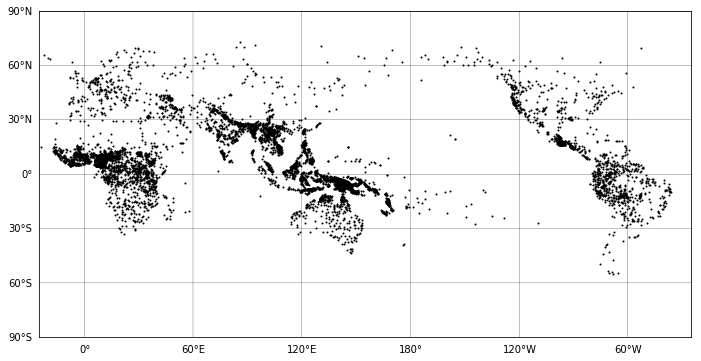

In [4]:
import warnings; warnings.simplefilter('ignore')

fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(ax=ax, projection='cyl', lon_0=155)
m.drawparallels(range(-90, 91, 30), dashes=[], linewidth=.25, labels=[1, 0, 0, 0])
m.drawmeridians(range(0, 360, 60), dashes=[], linewidth=.25, labels=[0, 0, 0, 1])
m.scatter(df['longitude'].values, df['latitude'].values, 1, color='k', latlon=True);

### Robinson projection

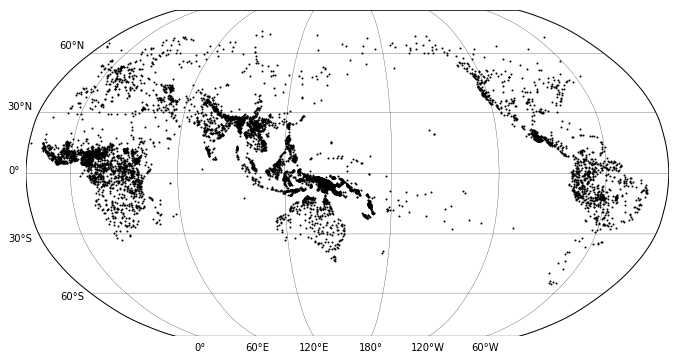

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(ax=ax, projection='robin', lon_0=155)
m.drawparallels(range(-90, 91, 30), dashes=[], linewidth=.25, labels=[1, 0, 0, 0])
m.drawmeridians(range(0, 360, 60), dashes=[], linewidth=.25, labels=[0, 0, 0, 1])
m.scatter(df['longitude'].values, df['latitude'].values, 1, color='k', latlon=True);

### Eckert IV projection

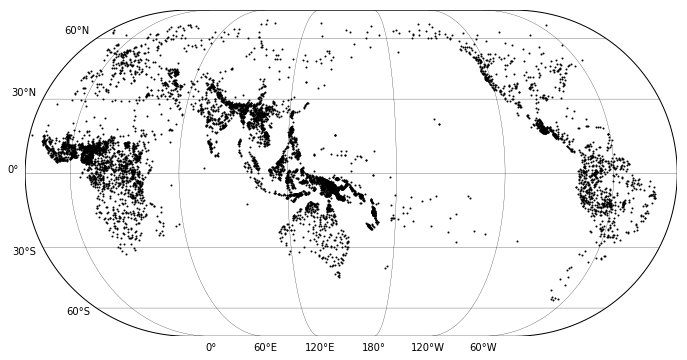

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(ax=ax, projection='eck4', lon_0=155)
m.drawparallels(range(-90, 91, 30), dashes=[], linewidth=.25, labels=[1, 0, 0, 0])
m.drawmeridians(range(0, 360, 60), dashes=[], linewidth=.25, labels=[0, 0, 0, 1])
m.scatter(df['longitude'].values, df['latitude'].values, 1, color='k', latlon=True);